<a href="https://colab.research.google.com/github/SethSekyere/SethMLClass/blob/main/ML_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MANE 4962: Machine Learning for Engineering
##Homework 6
#Seth Obimpeh Sekyere
##RIN:662055184



#Problem 1
#(a)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data  # Features
y = wine_data.target  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame to visualize the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Visualize the first two principal components
print(pca_df.head())


        PC1       PC2  Target
0  3.316751 -1.443463       0
1  2.209465  0.333393       0
2  2.516740 -1.031151       0
3  3.757066 -2.756372       0
4  1.008908 -0.869831       0


#(b.)

In [ ]:
# Fitting PCA to the standardized data
pca.fit(X_scaled)

# Get the explained variance ratio of the first two principal components
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance ratio of the first two principal components:")
print("PC1:", explained_variance_ratio[0])
print("PC2:", explained_variance_ratio[1])


Explained variance ratio of the first two principal components:
PC1: 0.3619884809992633
PC2: 0.1920749025700898


##Explained variance ratio of the first two principal components:
#PC1: 0.3619884809992633
#PC2: 0.1920749025700898

#(c)

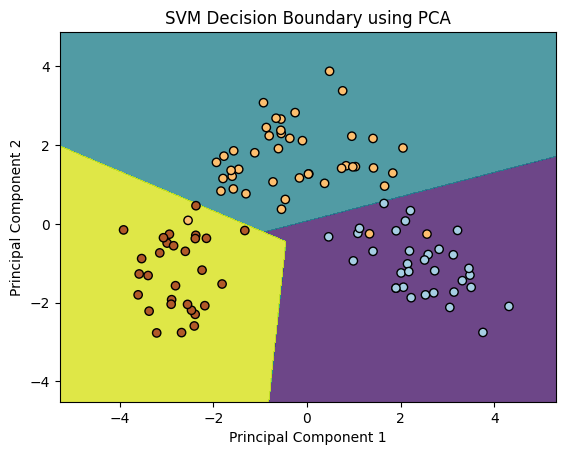

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)

# Step 2: Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Step 3: Visualize the decision boundary
# Create a meshgrid to plot decision regions
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plot decision boundary
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary using PCA')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into train and test sets (60%-40% split)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict the labels for test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM classifier:", accuracy)
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for SVM classifier
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')

print("SVM Classifier Metrics:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)


Accuracy of SVM classifier: 0.9722222222222222
SVM Classifier Metrics:
Precision: 0.9722222222222222
Recall: 0.9722222222222222


##The accuracy of the SVM classifier is 97.22%
##The precision of the SVM is 97.22%
##The recall of the SVM is 97.22%

#(d)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

# Split the original data into train and test sets (60%-40% split)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.4, random_state=42)

# Train decision tree classifier with max_depth=3
decision_tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree_classifier.fit(X_train_orig, y_train_orig)

# Predict the labels for test set
y_pred_orig = decision_tree_classifier.predict(X_test_orig)

# Calculate accuracy, precision, and recall for decision tree classifier
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
precision_orig = precision_score(y_test_orig, y_pred_orig, average='weighted')
recall_orig = recall_score(y_test_orig, y_pred_orig, average='weighted')

print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_orig)
print("Precision:", precision_orig)
print("Recall:", recall_orig)


Decision Tree Classifier Metrics:
Accuracy: 0.9305555555555556
Precision: 0.94140625
Recall: 0.9305555555555556


#After comparing the performance of both classifiers on the Wine dataset, it was found that the SVM classifier achieved an accuracy of 97.22%, while the decision tree classifier achieved an accuracy of 93.06%. However, the decision tree classifier provided additional insights into precision and recall(94.14% and 93.05% respectively). While the SVM classifier demonstrated higher accuracy(97.22%) compared to the decision tree classifier, the SVM had both precision and recall of (97.22%).

#(e)

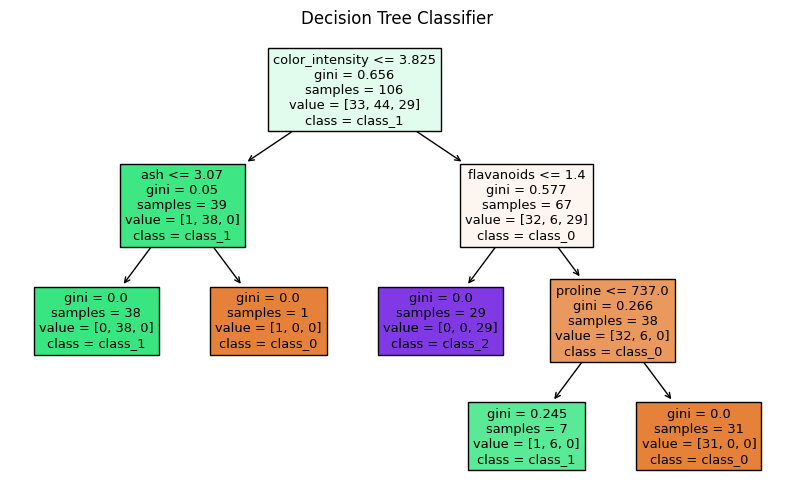

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree classifier
plt.figure(figsize=(10, 6))
plot_tree(decision_tree_classifier, filled=True, feature_names=wine_data.feature_names, class_names=wine_data.target_names)
plt.title("Decision Tree Classifier")
plt.show()


#Problem 2

In [ ]:
import tensorflow as tf

# Loading the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Printing the shape of the training and testing data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


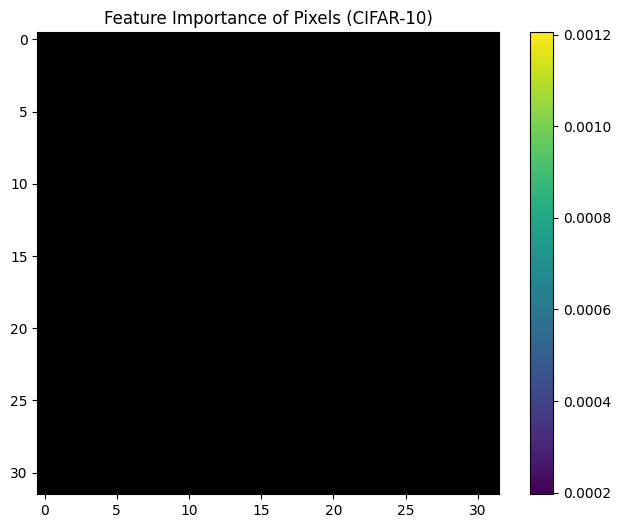

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Combine the training and testing sets
X_combined = np.vstack((X_train_flat, X_test_flat))
y_combined = np.vstack((y_train, y_test)).ravel()

# Train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_combined, y_combined)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Reshape feature importances back to the original image shape
feature_importances_image = feature_importances.reshape(32, 32, 3)

# Plot feature importances as an image
plt.figure(figsize=(8, 6))
plt.imshow(feature_importances_image)
plt.title('Feature Importance of Pixels (CIFAR-10)')
plt.colorbar()
plt.show()


##Problem 3

In [ ]:
from google.colab import files
import numpy as np

# Uploading the .npy file
uploaded = files.upload()

# Loading the .npy file
file_name = next(iter(uploaded))
data = np.load(file_name)

#  access the contents of the .npy file
print("Data shape:", data.shape)


Saving surface_temp.npy to surface_temp.npy
Data shape: (1000,)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the .npy file
data = np.load("surface_temp.npy")

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

# Assuming 'data_normalized' contains the normalized temperature data for 1000 timesteps
# Data preprocessing
sequence_length = 50  # Length of input sequences
next_timesteps = 10  # Number of timesteps to predict

# Generate sequences and targets
sequences = []
targets = []
for i in range(len(data_normalized) - sequence_length - next_timesteps + 1):
    sequences.append(data_normalized[i:i+sequence_length])
    targets.append(data_normalized[i+sequence_length:i+sequence_length+next_timesteps])

# Convert lists to numpy arrays
sequences = np.array(sequences)
targets = np.array(targets)

# Define and compile the RNN model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, 1)),
    Dense(next_timesteps)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(sequences, targets, epochs=10, batch_size=32)

# Make predictions for the next 10 timesteps
last_sequence = data_normalized[-sequence_length:].reshape(1, sequence_length, 1)
predicted_temperatures_normalized = model.predict(last_sequence)

# Inverse transform the predicted temperatures to get actual values
predicted_temperatures = scaler.inverse_transform(predicted_temperatures_normalized.reshape(-1, 1))

print("Predicted temperatures for the next 10 timesteps:", predicted_temperatures.flatten())


Epoch 1/10
30/30 [==============================] - 9s 47ms/step - loss: 0.2574
Epoch 2/10
30/30 [==============================] - 3s 87ms/step - loss: 0.0308
Epoch 3/10
30/30 [==============================] - 2s 52ms/step - loss: 0.0281
Epoch 4/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0278
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.0277
Epoch 6/10
30/30 [==============================] - 1s 25ms/step - loss: 0.0278
Epoch 7/10
30/30 [==============================] - 1s 25ms/step - loss: 0.0277
Epoch 8/10
30/30 [==============================] - 1s 24ms/step - loss: 0.0277
Epoch 9/10
30/30 [==============================] - 1s 26ms/step - loss: 0.0278
Epoch 10/10
1/1 [==============================] - 1s 627ms/step
Predicted temperatures for the next 10 timesteps: [373.08582 373.2006  373.37125 373.48895 373.2494  373.5074  373.4894
 373.61975 373.2475  373.14212]


#Hence the Predicted temperatures for the next 10 timesteps are 373.08582, 373.2006,  373.37125 ,373.48895 ,373.2494 , 373.5074 , 373.4894 ,373.61975 ,373.2475 , 373.14212

Intentionally left blank

In [ ]:
#for printing

In [ ]:
#for printing

intentionally left blank
